In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

import pandas_datareader as pdr

In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,30)
#ibm = pdr.get_data_yahoo(symbols='A2A.MI', start=start, end=end)
ibm = yf.download('^BIT40N', start, end)['Close']
ibm

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02 00:00:00+01:00    3126.780029
2017-01-03 00:00:00+01:00    3137.939941
2017-01-04 00:00:00+01:00    3136.590088
2017-01-05 00:00:00+01:00    3138.070068
2017-01-06 00:00:00+01:00    3146.699951
                                ...     
2017-12-21 00:00:00+01:00    3595.979980
2017-12-22 00:00:00+01:00    3589.010010
2017-12-27 00:00:00+01:00    3592.209961
2017-12-28 00:00:00+01:00    3576.760010
2017-12-29 00:00:00+01:00    3537.189941
Name: Close, Length: 255, dtype: float64

# 1.	Собрем данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период. Добавим (если нет) данные по индексу рынка. 

In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,30)
ticker_list = []

with open("Titles.txt", "r") as f:
    for line in f:
        ticker_list.append(line[:-1]+".MI")

In [3]:
ticker_list[:5]

['A2A.MI', 'ABT.MI', 'ACE.MI', 'AED.MI', 'AEF.MI']

In [4]:
data = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  data[ticker] = yf.download(ticker, start, end)['Close']
  if data[ticker][0] is np.nan:
    data[ticker] = yf.download(ticker[:-2], start, end)['Close']
  #ibm = pdr.get_data_yahoo(symbols=ticker, start=start, end=end)
data = data.dropna(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AED.MI: Data doesn't exist for startDate = 1483225200, endDate = 1514588400
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALW.MI: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 o

In [6]:
clean_data = list(data)
with open('Clean_titles.txt', 'w') as filehandle:  
    for l in clean_data:
        filehandle.write(l + '\n')



In [6]:
data.head(10)

,A2A.MI,ABT.MI,ACE.MI,AEF.MI,ADB.MI,ARN.MI,AMP.MI,ANIM.MI,ASC.MI,ATL.MI,...,TFI.MI,TB.MI,TXT.MI,UCG.MI,UNI.MI,US.MI,VLS.MI,WBD.MI,ZV.MI,ZUC.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,1.262,2.329,11.60,1.190,10.29,2.914,9.200,4.917725,2.766,22.760000,...,10.001222,2.784,8.090,14.048960,3.502,2.070,16.010000,3.106,5.600,2.35
2017-01-03 00:00:00+01:00,1.261,2.329,11.58,1.182,10.49,2.902,9.000,4.955626,2.820,22.480000,...,10.269968,2.782,8.070,14.069002,3.560,2.112,16.540001,3.166,5.705,2.27
2017-01-04 00:00:00+01:00,1.269,2.300,11.75,1.180,10.77,2.908,9.060,4.984052,2.786,22.410000,...,10.010820,2.770,8.030,14.028919,3.550,2.134,16.860001,3.176,5.655,2.26
2017-01-05 00:00:00+01:00,1.265,2.300,11.70,1.173,10.65,2.904,9.060,5.197249,2.750,22.320000,...,10.078006,2.790,8.120,14.079022,3.564,2.130,16.850000,3.140,5.720,2.22
2017-01-06 00:00:00+01:00,1.256,2.302,11.70,1.188,10.63,2.930,9.000,5.159347,2.744,22.299999,...,9.982025,2.772,8.140,14.119105,3.570,2.118,16.900000,3.186,5.710,2.21
2017-01-09 00:00:00+01:00,1.241,2.307,11.60,1.164,10.68,2.902,8.945,5.116708,2.710,22.389999,...,9.770867,2.798,8.500,13.397618,3.474,2.090,16.700001,3.096,5.780,2.14
2017-01-10 00:00:00+01:00,1.235,2.307,11.59,1.147,10.66,2.900,8.900,5.145134,2.710,22.370001,...,10.365949,2.838,8.700,13.427680,3.534,2.076,16.700001,3.140,5.800,2.11
2017-01-11 00:00:00+01:00,1.256,2.307,11.53,1.213,10.86,2.900,8.795,5.268314,2.722,22.200001,...,10.279566,3.000,8.670,13.157122,3.572,2.098,16.790001,3.176,5.735,2.09
2017-01-12 00:00:00+01:00,1.273,2.300,11.65,1.182,10.84,2.850,8.745,5.201986,2.720,22.070000,...,10.423538,2.840,8.495,12.926647,3.496,2.036,16.600000,3.156,5.730,2.05


### Мы взяли за индекс рынка "Италия 40" с сайта investing.com

In [44]:
index_r = pd.read_csv("Italia_40.csv", index_col="Дата")
index_r = index_r.drop('Цена', axis=1)
index_r = index_r.drop('Макс.', axis=1)
index_r = index_r.drop('Мин.', axis=1)
index_r = index_r.drop('Объём', axis=1)
index_r = index_r.drop('Изм. %', axis=1)
index_r = index_r.reindex(index=index_r.index[::-1])
index_r["Откр."] = index_r["Откр."].apply(lambda x: x.replace(",", ""))
index_r["Откр."] = pd.to_numeric(index_r["Откр."])
index_r.head()

,Откр.
Дата,
02.01.2017,1.8740
03.01.2017,1.9241
04.01.2017,1.9209
05.01.2017,1.9102
06.01.2017,1.9195


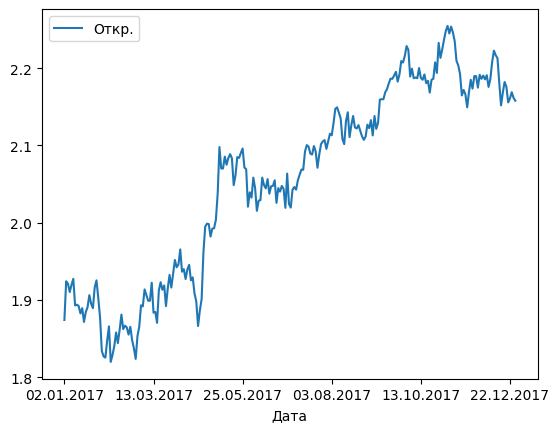

<Figure size 1000x1000 with 0 Axes>

In [45]:
index_r.plot()
plt.figure(figsize=(10, 10))
plt.show()

На графике выше изображен индекс Italia 40 за 2017 год.

# 2.	Преобразуем данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E). 

Высчисляем логарифмическую доходность и риск активов

In [31]:
ticker_list = list(data)
N = len(ticker_list)
n = data.shape[0] - 1
prices = data.values
prices = prices.transpose()
profitability = np.empty((N, n))

for i in range (N):
  for j in range (n):
    profitability[i][j] = math.log(prices[i][j+1]/prices[i][j])
means = np.empty(N)
vars = np.empty(N)   
 
for i in range(N):
  means[i] = statistics.mean(profitability[i])
  vars[i] = math.sqrt(statistics.variance(profitability[i]))

Вычислим также эти параметры для индекса рынка

In [46]:
index_r_price = index_r.values.flatten()
index_r_buffer = np.empty(n-2)
for i in range(n-2):
  index_r_buffer[i] = math.log(index_r_price[i+1]/index_r_price[i])
index_r_mean = statistics.mean(index_r_buffer)
index_r_var = math.sqrt(statistics.variance(index_r_buffer))

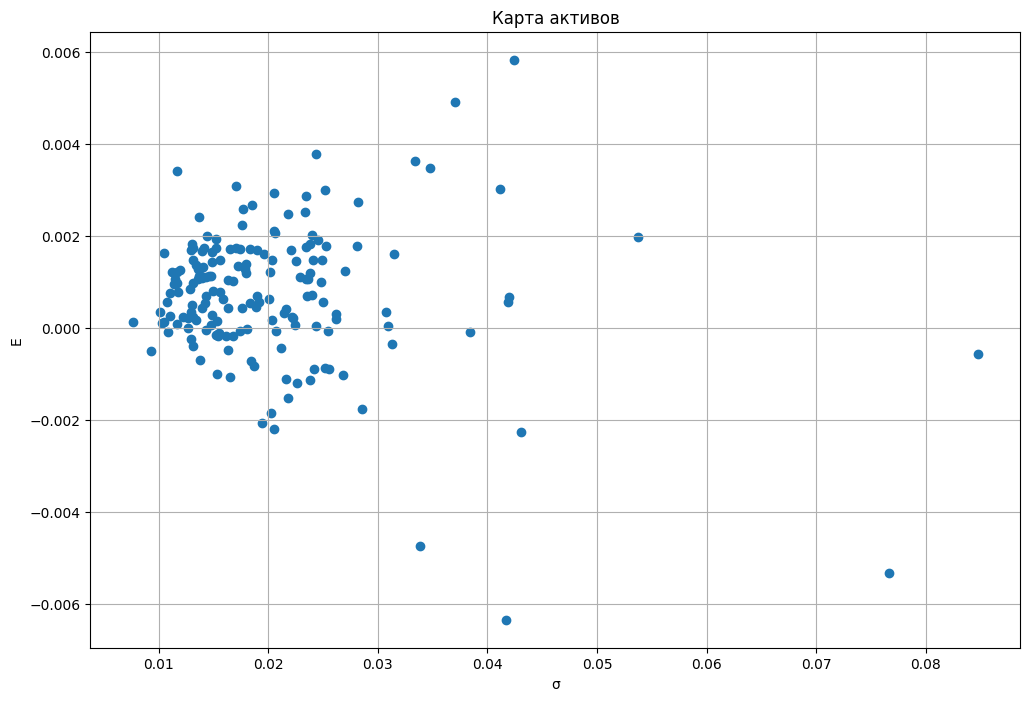

In [47]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов")
plt.scatter(vars, means)
plt.show()

# 3.	Рассмотрим портфель с равными долями капитала и отметим его на карте активов в системе координат   (σ, E).  Дадим характеристику этому портфелю.

In [48]:
cov = np.cov(profitability)
mean_balanced = np.mean(means)
var_balanced = math.sqrt(np.sum(cov) / (cov.shape[0] ** 2))

print(f"Доходность сбалансированного портфеля Е - {mean_balanced}")
print(f"Риск сбалансированного портфеля       σ - {var_balanced}")

Доходность сбалансированного портфеля Е - 0.0007350754373507614
Риск сбалансированного портфеля       σ - 0.006152934562225219


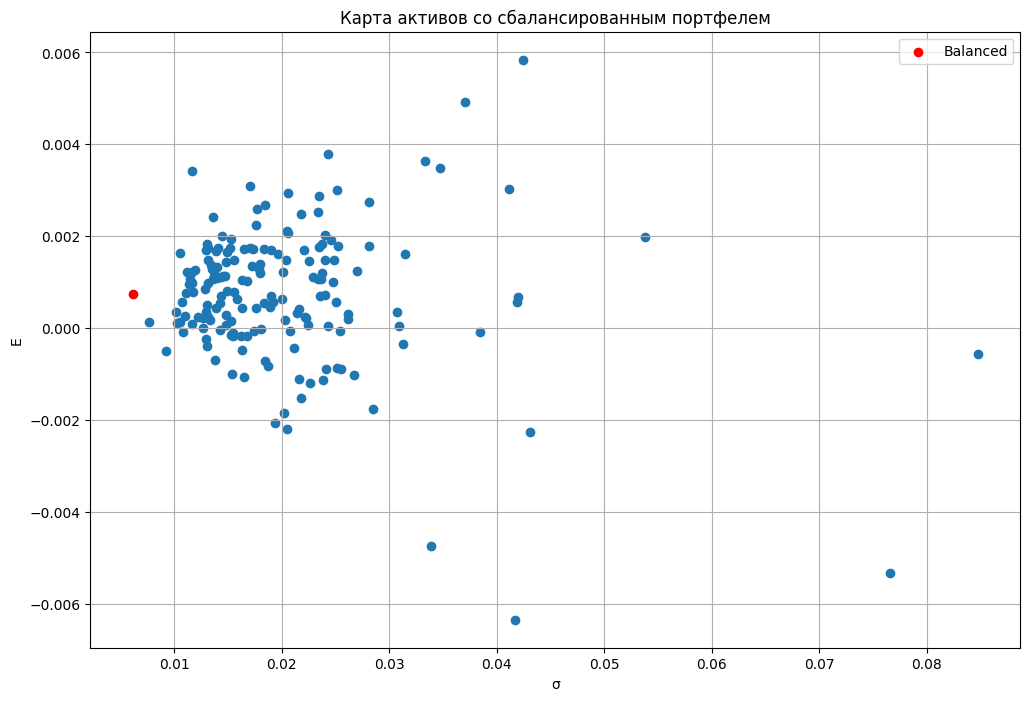

In [49]:
plt.figure(figsize=(12, 8))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов со сбалансированным портфелем")
plt.scatter(vars, means)
plt.scatter(var_balanced, mean_balanced, color='red', label="Balanced")
plt.legend()
plt.show()

Построив график, можно сделать вывод о том, что сбалансированный портфель имеет ненулевую положительную доходность, а также его риск ниже, чем у любого другого отдельно рассматриваемого актива. Не исключено, что он лежит на эффективном фронте.

# 4.	Рассмотрим индекс рынка и отметьте его на карте активов в системе координат   (σ,E). Дайте характеристику индексу рынка.  

In [50]:
print(f"Доходность индекса рынка Е - {index_r_mean}")
print(f"Риск индекса рынка       σ - {index_r_var}")

Доходность индекса рынка Е - 0.0005822507680087428
Риск индекса рынка       σ - 0.008750065715785484


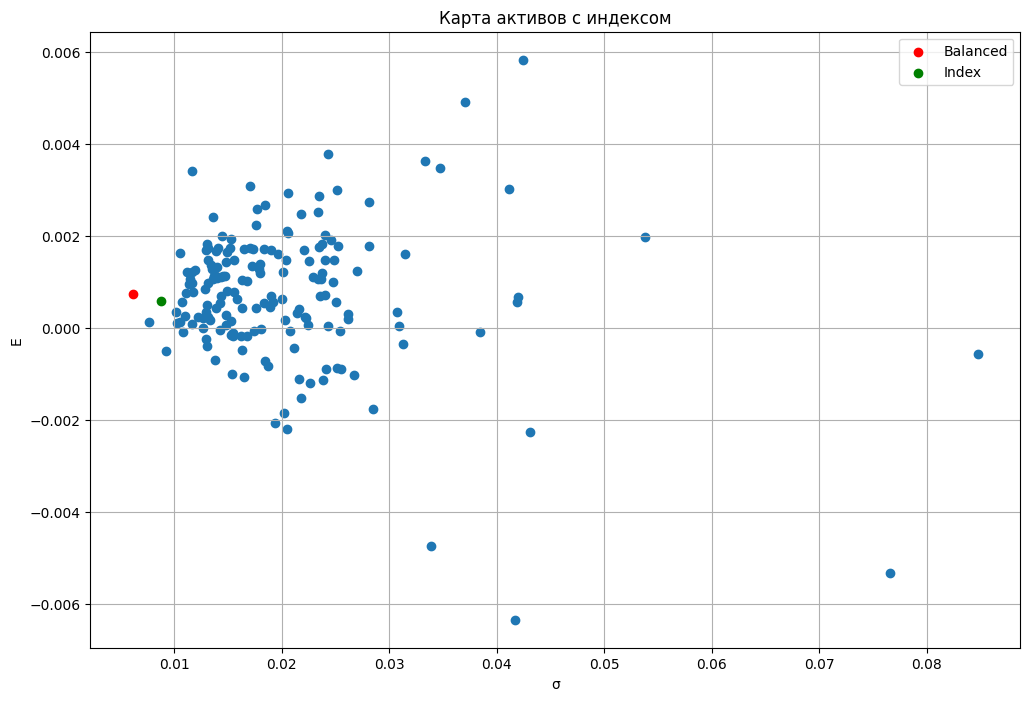

In [51]:
plt.figure(figsize=(12, 8))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов с индексом")
plt.scatter(vars, means)
plt.scatter(var_balanced, mean_balanced,color='red', label="Balanced")
plt.scatter(index_r_var, index_r_mean, color='green', label="Index")
plt.legend()
plt.show()

Построив график, можно сделать вывод о том, что индекс рынка имеет ненулевую положительную доходность, однако она немного ниже, чем доходность сбалансированного портфеля, также его риск выше, чем у сбалансированного портфеля и одного другого отдельно рассматриваемого актива.

# 5.	Зададим уровень риска и оцените VaR (Value at Risk = Сумма под Риском для случайных величин Потери = - Доходности) для активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? Дадим характеристику VaR портфеля с равными долями и индекса рынка.

In [52]:
loss = -profitability
alpha = 0.05
VaRs = np.quantile(loss, 1 - alpha, axis=1)

print(f"Лучший актив по VaR - {ticker_list[VaRs.argmin()]}")

Лучший актив по VaR - BO.MI


In [53]:
idx = VaRs.argmin()
mean_best_VaR = means[idx]
var_best_VaR = vars[idx]

print(f"Доходность наилучшего актива Е - {mean_best_VaR}")
print(f"Риск наилучшего актива       σ - {var_best_VaR}")

Доходность наилучшего актива Е - 0.003418136832208496
Риск наилучшего актива       σ - 0.01163908757561748


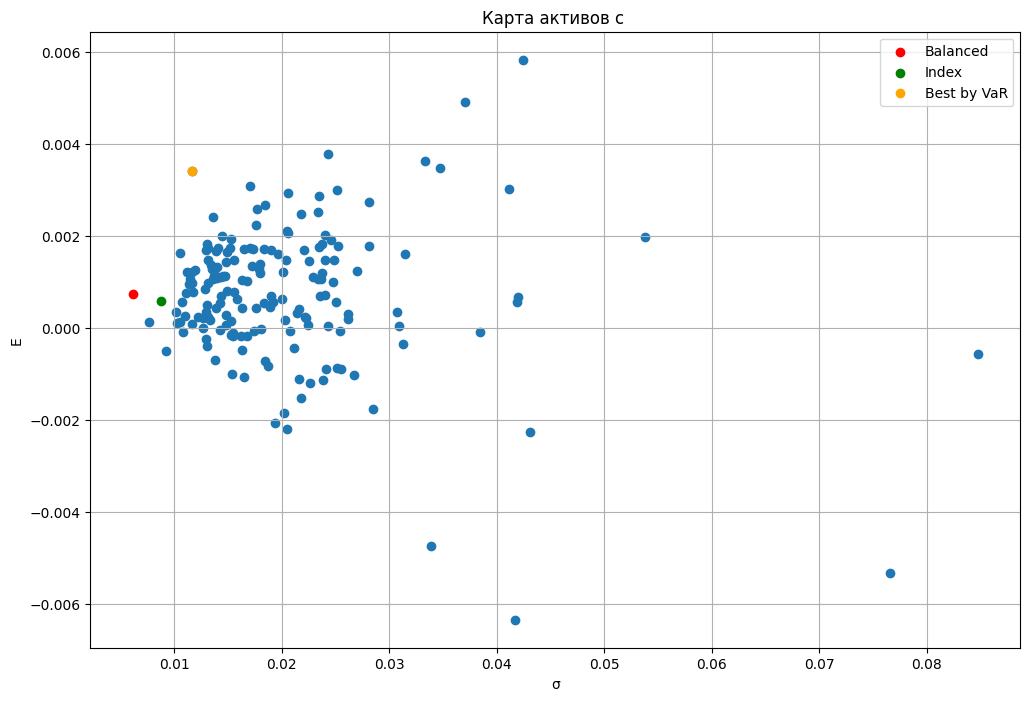

In [54]:
plt.figure(figsize=(12, 8))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов с ")
plt.scatter(vars, means)
plt.scatter(var_balanced, mean_balanced,color='red', label="Balanced")
plt.scatter(index_r_var, index_r_mean, color='green', label="Index")
plt.scatter(var_best_VaR, mean_best_VaR,color="orange" , label="Best by VaR")
plt.legend()
plt.show()

In [55]:
moex_VaR = np.quantile(-index_r, 1 - alpha)
print(f"Значение VaR для индекса рынка {moex_VaR}")

equal_shares_return = np.mean(profitability, axis=0)
equal_shares_VaR = np.quantile(-equal_shares_return, 1 - alpha)
print(f"Значение VaR для сбалансированного портфеля {equal_shares_VaR}")

Значение VaR для индекса рынка -1.856855
Значение VaR для сбалансированного портфеля 0.01138732176176659


Можно замететить, что значение VaR для сбалансированного портфеля значительно выше, чем для индекса Italia 40.

# 6.	Выберем несколько интересных (значимых)  активов рынка.   Можно ли считать наблюдаемые доходности (объемы продаж) конкретного актива повторной выборкой из некоторого распределения (белый шум)? 

#### Гипотеза о случайности

$X = (X_1, X_2 ... X_n)$ - выборка.

$H_0$ - гипотеза случайности. Если она верна, то случайные величины в выборке независимы и не являются повторной выборкой из распределения.

$H_1$ - гипотеза случайности отвергается, данные являются повторной выборкой

#### Критерий инверсий

Говорят, что компоненты $X_i, X_j$ образуют инверсию, если $i<j$ и $X_i > X_j$ 
 
Общее число инверсий можно рассматривать как статистику $T_n$ для выборки.

Интервал значений статистики: $0 <= T_n <= \frac{n(n-1)}{2}$

Чем ближе значение к границам интервала, тем больше упорядоченность данных. Гипотеза случайности отклоняется если данные упорядоченны, не хаотичны.

Матожидание и дисперсия статистики $T_n$
По Ивченко и Медведеву:

"$E(T_n)=\frac{n(n-1)}{4}$ ",

"$D(T_n)=\frac{n(n-1)(2n+5)}{72}$"

Гипотеза не будет отвергнута, если нормализованная статистика $T_n$ 
не будет превышать процентную точку для заданного уровня доверия $\alpha$ 

Нормализованная статистика $T_n$ вычисляется по формуле: $\frac{T_n - E(T_n)}{\sqrt{D(T_n)}}$

Распространенный уровень доверия $\alpha$ - 0.05

- MONC.MI - крупный продавец одежды
- ISP.MI  - Intesa Sanpaolo это крупнейший банк Италии по размеру активов и 27-й по величине в мире
- ENI.MI  - итальянская транснациональная энергетическая компания со штаб-квартирой в Риме
- ENEL.MI - Ente nazionale per l'energia elettrica итальянский многонациональный производитель и дистрибьютор электроэнергии и газа.

In [69]:
ticker_interesting = ["MONC.MI", "ISP.MI", "ENI.MI", "ENEL.MI"] 

In [71]:
df = pd.DataFrame(columns=ticker_interesting)
for ticker in ticker_interesting:
  df[ticker] = yf.download(ticker, start, end)['Volume']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MONC.MI,ISP.MI,ENI.MI,ENEL.MI
Date,,,,
2017-01-02 00:00:00+01:00,644667,57039371,8592261,28061628
2017-01-03 00:00:00+01:00,711449,104179098,16079269,30871639
2017-01-04 00:00:00+01:00,919366,104668526,13438360,29341608
2017-01-05 00:00:00+01:00,927406,100996502,11657069,33926120
2017-01-06 00:00:00+01:00,720832,82750043,9295912,25984689


In [200]:
def count_inversions(arr):
  inv_count = 0
  for i in range(len(arr)-1):
    for j in arr[i+1:]:
      if arr[i] > j:
        inv_count += 1
  return inv_count

In [209]:
for i in ticker_interesting:
    alpha = 0.01
    profitability_noize = data[i]
    Tn = count_inversions(profitability_noize)
    n = len(profitability_noize)
    E_Tn = (n*(n-1))/4
    D_Tn = (n*(n-1)*(2*n+5))/72
    normalized_Tn = (Tn - E_Tn)/(D_Tn**(1/2))
    p_value = round(stats.norm.sf(abs(normalized_Tn))*2, 50)
    if abs(normalized_Tn) >= stats.norm.ppf(1 - alpha/2):
        print('Гипотеза для компании', i, 'отвергается, p_value', p_value)
    else:
        print('Гипотеза для компании', i, 'принимается, p_value', p_value)

Гипотеза для компании MONC.MI отвергается, p_value 0.0
Гипотеза для компании ISP.MI отвергается, p_value 2.8060324404139996e-38
Гипотеза для компании ENI.MI отвергается, p_value 8.183187505353836e-19
Гипотеза для компании ENEL.MI отвергается, p_value 0.0


In [210]:
for i in ticker_interesting:
    alpha = 0.01
    profitability_noize = df[i]
    Tn = count_inversions(profitability_noize)
    n = len(profitability_noize)
    E_Tn = (n*(n-1))/4
    D_Tn = (n*(n-1)*(2*n+5))/72
    normalized_Tn = (Tn - E_Tn)/(D_Tn**(1/2))
    p_value = round(stats.norm.sf(abs(normalized_Tn))*2, 20)
    if abs(normalized_Tn) >= stats.norm.ppf(1 - alpha/2):
        print('Гипотеза для компании', i, 'отвергается, p_value', p_value)
    else:
        print('Гипотеза для компании', i, 'принимается, p_value', p_value)

Гипотеза для компании MONC.MI отвергается, p_value 0.0009692598541346086
Гипотеза для компании ISP.MI отвергается, p_value 3.34e-18
Гипотеза для компании ENI.MI отвергается, p_value 6.260844998675446e-05
Гипотеза для компании ENEL.MI отвергается, p_value 1.52e-18


# 7.	Выберем несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности (объемы продаж) являются повторной выборкой из некоторого распределения исследуем (выборочно) распределения доходностей и объемов продаж выбранных активов. Сделать выводы. 

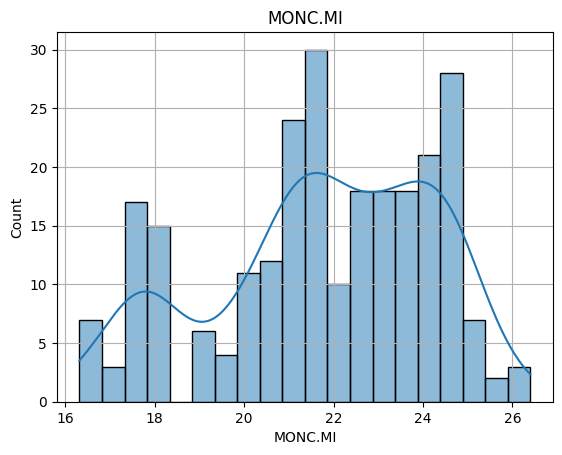

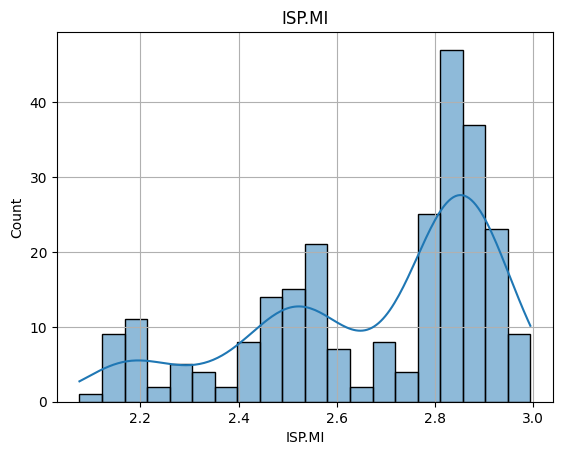

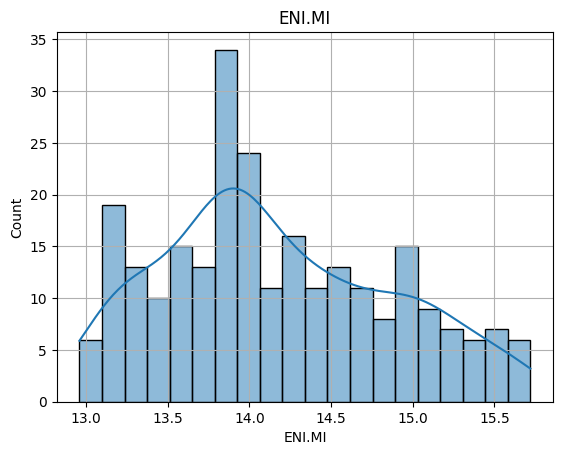

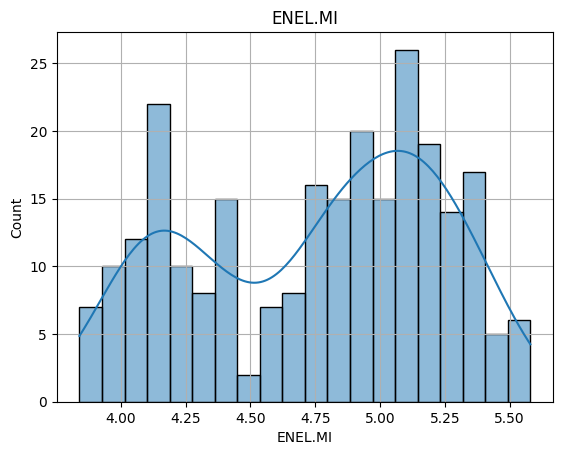

In [81]:
for i in ticker_interesting:
  plt.grid()
  sns.histplot(data[i], bins=20, kde=True)
  plt.title(i)
  plt.show()

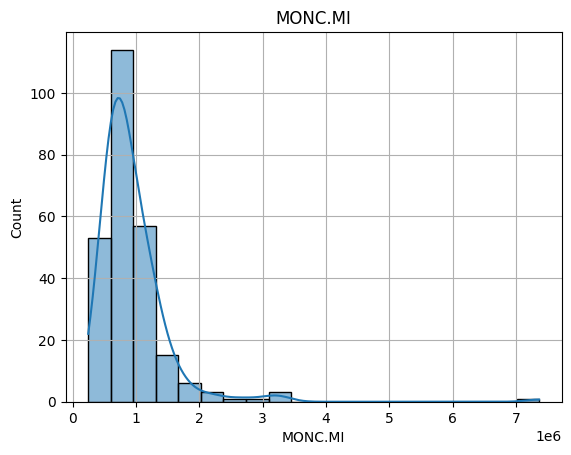

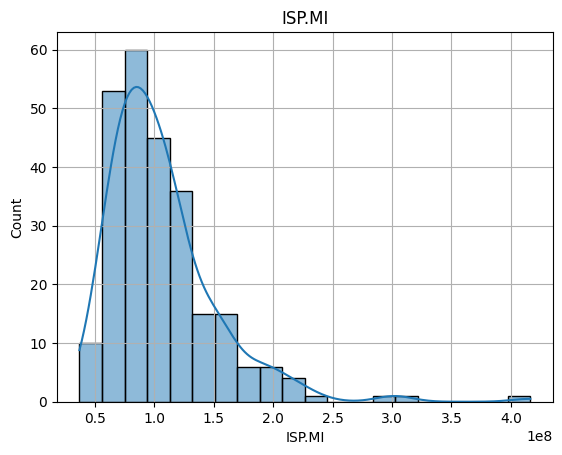

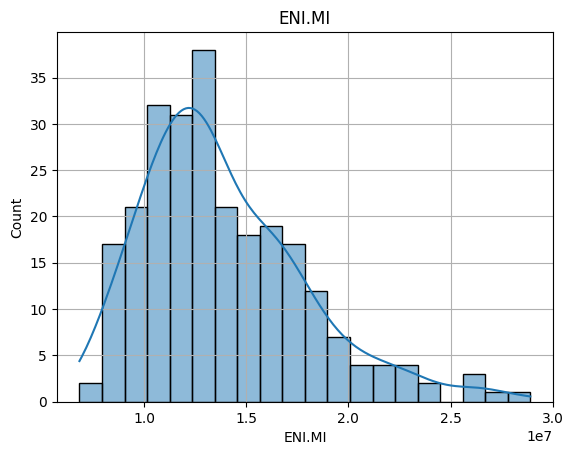

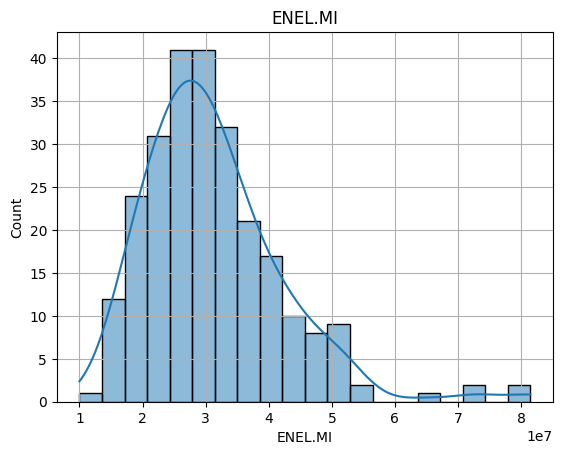

In [79]:
for i in ticker_interesting:
  plt.grid()
  sns.histplot(df[i], bins=20, kde=True)
  plt.title(i)
  plt.show()

Тест д'Агостино

In [197]:
def test(value, alfa=0.1):
    result = stats.normaltest(value)
    
    p = result[1]
    answer = 'не отклоняется' if p > alfa else 'отклоняется'
    print(f"Гипотеза {answer}, p-value={p:3f}")
    

In [198]:
print("Доходности\n")
for i in ticker_interesting:
  print(i, end=":")
  test(data[i])

Доходности

MONC.MI:Гипотеза отклоняется, p-value=0.000027
ISP.MI:Гипотеза отклоняется, p-value=0.000001
ENI.MI:Гипотеза отклоняется, p-value=0.000043
ENEL.MI:Гипотеза отклоняется, p-value=0.000000


In [199]:
print("Объемы\n")
for i in ticker_interesting:
  print(i, end=":")
  test(df[i])

Объемы

MONC.MI:Гипотеза отклоняется, p-value=0.000000
ISP.MI:Гипотеза отклоняется, p-value=0.000000
ENI.MI:Гипотеза отклоняется, p-value=0.000000
ENEL.MI:Гипотеза отклоняется, p-value=0.000000


Графики по доходностям не похожи на какое-либо распределение, графики по объёмам продаж имеют небольшое сходство с нормальным распределением, но при этом они достаточно ассиметричны. Тест Д'Агостино подтверждает, что наблюдаемые доходности и объёмы продаж не являются повторной выборкой из нормального распределения.

# 8.	Исследуем зависимости (выборочно) между доходностями различных активов с помощью техники анализа зависимостей. Сделайте анализ зависимостей между парами активов для активов из одного производственного сектора и для активов из разных производственных секторов. Сделайте анализ зависимости (выборочно) между доходностями и объемами продаж одного актива. Рассмотрите активы из разных производственных секторов. 

In [90]:
ticker_one_sector = ["ADB.MI", "ATL.MI", "AUTME.MI", "AVIO.MI","B.MI"]

In [93]:
profitability_o_s = [data[i] for i in ticker_one_sector]

<AxesSubplot: >

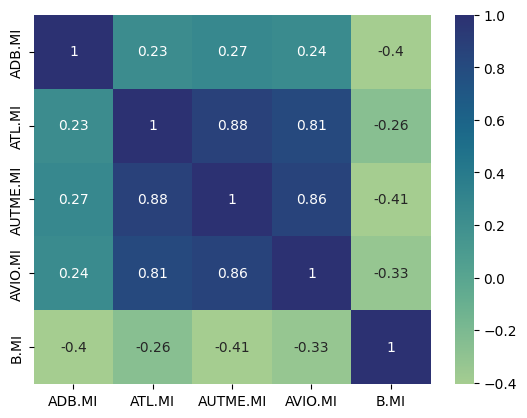

In [96]:
corr_one_sector = np.corrcoef(profitability_o_s) 
sns.heatmap(corr_one_sector, cmap="crest",annot=True, xticklabels=ticker_one_sector, yticklabels=ticker_one_sector)

Так как мы рассматриваем активы из одного производственного сектора, то не удивительно, что мы можем наблюдать достаточно высокие корреляции у некоторых активов.

<AxesSubplot: >

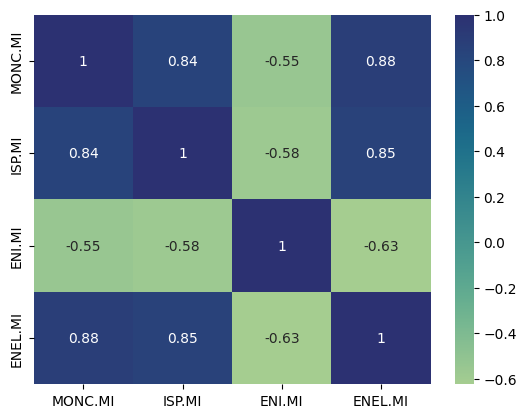

In [97]:
profitability_d_s = [data[i] for i in ticker_interesting]
corr_one_sector = np.corrcoef(profitability_d_s) 
sns.heatmap(corr_one_sector, cmap="crest",annot=True, xticklabels=ticker_interesting, yticklabels=ticker_interesting)

Можно заметить, что у большинства активов наблюдается достаточно сильная корреляция несмотря на то, что они относятся к разным производственным секторам. Примечательно, что у актива ENI.MI видна обратная корреляция с другими активами.

### Анализ зависимости между доходностями и объемами продаж одного актива

In [211]:
def dependency_one_active(ticker_name):
    corr_map = np.corrcoef(np.vstack((data[ticker_name], df[ticker_name])))

    ax = plt.axes()
    sns.heatmap(corr_map, cmap="crest", annot=True, ax=ax, xticklabels=["profitability", "volumes"], yticklabels=["profitability", "volumes"])
    ax.set_title(ticker_name)
    plt.show()

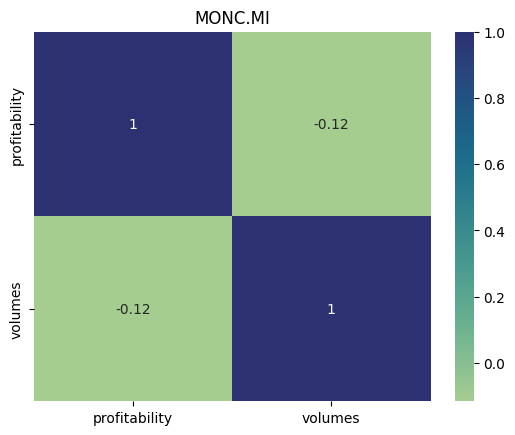

In [212]:
dependency_one_active(ticker_interesting[0])

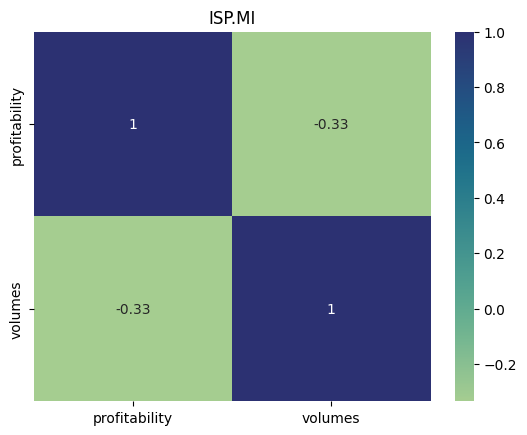

In [213]:
dependency_one_active(ticker_interesting[1])

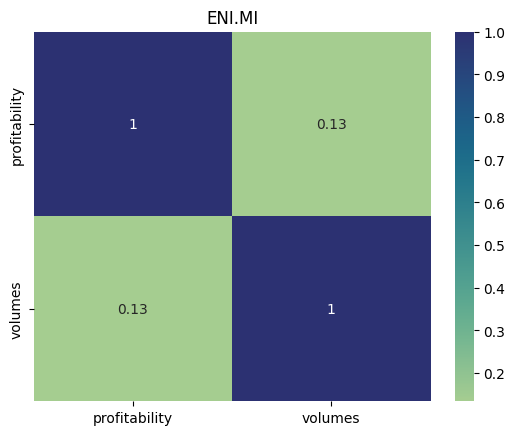

In [214]:
dependency_one_active(ticker_interesting[2])

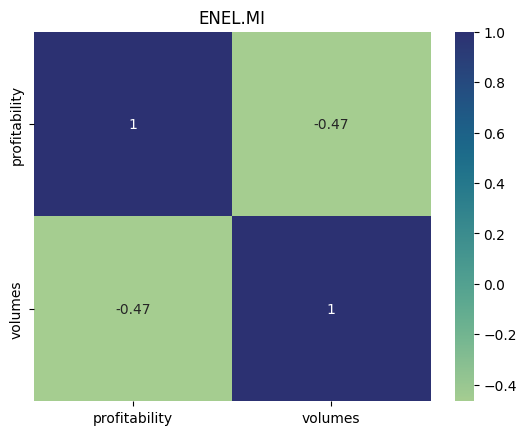

In [215]:
dependency_one_active(ticker_interesting[3])

Можно сделать вывод, что у всех рассматриваемых активов не наблюдается высокой корреляции между доходностью и объёмами продаж. Однако можно выделить последний случай, где присутствует относительно большая обратная корреляция.